In [1]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
###############################################################################
#################### COMPARE RADIAL DISTRIBUTION OF VEER  #####################
###############################################################################

#%% Import modules
import os
import numpy as np   
import matplotlib.pyplot as mpyplot
import matplotlib.dates as mdates 
import matplotlib.colors as mcolors 
import matplotlib.style as mstyle
import pandas as pandas
import cmocean
import datetime
import scipy as scipy
from scipy import stats,signal
import pandas
import xarray as xr              
import pickle

print("done importing modules")


done importing modules


In [2]:
#%% Define file locations
WRF_DIRECTORY_26 = "/pl/active/JKL_IDEAL/hurricanes/sst_26/"
WRF_DIRECTORY_28 = "/pl/active/JKL_IDEAL/hurricanes/sst_28/" 
WRF_DIRECTORY_30 = "/pl/active/JKL_IDEAL/hurricanes/sst_30/"  
WRF_DIRECTORY_32 = "/pl/active/JKL_IDEAL/hurricanes/sst_32/"  #"/rc_scratch/misa5952/hurricanes/nudge_sst_32/"   
WRF_DIRECTORY_34 = "/pl/active/JKL_IDEAL/hurricanes/sst_34/" #"/rc_scratch/misa5952/hurricanes/sst_34_NBA/"  

fName_condProb = 'condProb.pkl'
fName_edges_gust = 'edges_gust.pkl'
fName_edges_mean = 'edges_mean.pkl'

dirFig = "/pl/active/JKL_IDEAL/hurricanes/Figures/"



In [3]:
#%% Turbine specs
z_hh = 90
D = 126

In [4]:
#%% Extract radial distribution of veer
# 26 deg C
with open(WRF_DIRECTORY_26 + fName_condProb, 'rb') as file:
    hist_gust_mean_rangeStats_26 = pickle.load(file)
with open(WRF_DIRECTORY_26 + fName_edges_gust, 'rb') as file:
    edges_gust_26 = pickle.load(file)
with open(WRF_DIRECTORY_26 + fName_edges_mean, 'rb') as file:
    edges_mean_26 = pickle.load(file)
# 28 deg C
with open(WRF_DIRECTORY_28 + fName_condProb, 'rb') as file:
    hist_gust_mean_rangeStats_28 = pickle.load(file)
with open(WRF_DIRECTORY_28 + fName_edges_gust, 'rb') as file:
    edges_gust_28 = pickle.load(file)
with open(WRF_DIRECTORY_28 + fName_edges_mean, 'rb') as file:
    edges_mean_28 = pickle.load(file)
# 30 deg C
with open(WRF_DIRECTORY_30 + fName_condProb, 'rb') as file:
    hist_gust_mean_rangeStats_30 = pickle.load(file)
with open(WRF_DIRECTORY_30 + fName_edges_gust, 'rb') as file:
    edges_gust_30 = pickle.load(file)
with open(WRF_DIRECTORY_30 + fName_edges_mean, 'rb') as file:
    edges_mean_30 = pickle.load(file)
# 32 deg C
with open(WRF_DIRECTORY_32 + fName_condProb, 'rb') as file:
    hist_gust_mean_rangeStats_32 = pickle.load(file)
with open(WRF_DIRECTORY_32 + fName_edges_gust, 'rb') as file:
    edges_gust_32 = pickle.load(file)
with open(WRF_DIRECTORY_32 + fName_edges_mean, 'rb') as file:
    edges_mean_32 = pickle.load(file)
# 34 deg C
with open(WRF_DIRECTORY_34 + fName_condProb, 'rb') as file:
    hist_gust_mean_rangeStats_34 = pickle.load(file)
with open(WRF_DIRECTORY_34 + fName_edges_gust, 'rb') as file:
    edges_gust_34 = pickle.load(file)
with open(WRF_DIRECTORY_34 + fName_edges_mean, 'rb') as file:
    edges_mean_34 = pickle.load(file)

In [5]:
#%% Colors for each case
col_26 = 'steelblue'
col_28 = 'tab:green'
col_30 = 'goldenrod'
col_32 = 'firebrick'
col_34 = 'tab:purple'
cols = [col_26,col_28,col_30,col_32,col_34]


In [6]:
#%% Eyewall for each case
r_eye_26 = 13805
r_eye_28 = 21300
r_eye_30 = 20333
r_eye_32 = 27055
r_eye_34 = 33638.915
    

## Current IEC profiles for 3-sec and 10-min winds

In [7]:
#%% Define functions to estiamte atmospheric conditions during extreme events (IEC models)

def EWM_turbulent(u_ref,u_hub,z_rotor,z_hub):
    # 10-min hub-height wind speed for 50-year and 1-year recurrence
    u_50 = u_ref*((z_rotor/z_hub)**0.11);
    u_1 = 0.8*u_50;
    # Turbulence standard deviation
    std = 0.11*u_hub
    return [u_50,u_1,std]

def EWM_steady(u_ref,z_rotor,z_hub):
    # 3-sec hub-height wind speed for 50-year and 1-year recurrence
    u_e50 = 1.4*u_ref*((z_rotor/z_hub)**0.11);
    u_e1 = 0.8*u_e50;
    return [u_e50,u_e1]

# Reference conditions for turbine class
I_ref = 0.16 # Class A turbine
U_ref = np.array([50]) # Class I turbine


z_TL = np.linspace(10,250,20)
i_z_IEC = np.argmin(np.abs(z_TL - z_hh))

## 6.1a
# EWM turbulent wind model
# U_hub = 0.95*U_ref
U_hub = 0.95*U_ref
U_50_61a,U_1_61a,STD_61a = EWM_turbulent(U_ref,U_hub,z_TL,z_hh)
print('10-min extreme wind speed is %f (%f) for 50-year and 1-year recurrence' % (U_50_61a[i_z_IEC],U_1_61a[i_z_IEC]))
print('Turbulence standard deviation is %f' % (STD_61a))

## 6.1b
# EWM steady wind model
# U_hub = U_e50
U_e50_61b,U_e1_61b = EWM_steady(U_ref,z_TL,z_hh)
print('3-sec extreme wind speed is %f (%f) for 50-year and 1-year recurrence' % (U_e50_61b[i_z_IEC],U_e1_61b[i_z_IEC]))



10-min extreme wind speed is 49.737170 (39.789736) for 50-year and 1-year recurrence
Turbulence standard deviation is 5.225000
3-sec extreme wind speed is 69.632038 (55.705630) for 50-year and 1-year recurrence


## Compare IEC and hurricane data

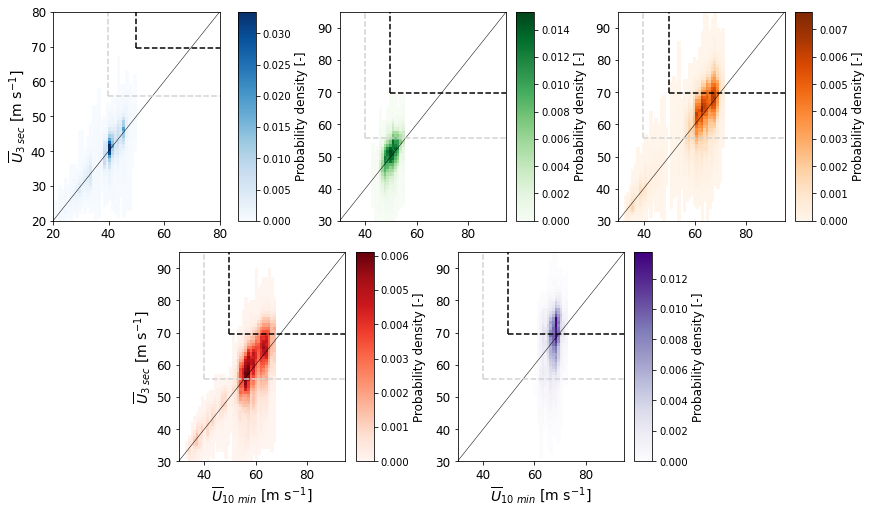

In [8]:
#%% Figure showing 2-d histogram

limX = [30,95]
limY = [30,95]

import matplotlib.gridspec as gridspec

fig3 = mpyplot.figure(figsize=(12,7),constrained_layout=True)
gs = fig3.add_gridspec(2, 6)

f3_ax1 = fig3.add_subplot(gs[0, 0:2])
hist_gust_mean_rangeStats_26[hist_gust_mean_rangeStats_26==0] = np.nan
hist_gust_mean_rangeStats_26[0,0] = 0
im1 = mpyplot.pcolormesh(edges_mean_26[1:],edges_gust_26[1:],hist_gust_mean_rangeStats_26,cmap=mpyplot.cm.Blues)
mpyplot.plot([20,100],[20,100],'-k',linewidth=0.5)
# 50-year winds
mpyplot.plot([U_50_61a[i_z_IEC],100],[U_e50_61b[i_z_IEC],U_e50_61b[i_z_IEC]],'--k')
mpyplot.plot([U_50_61a[i_z_IEC],U_50_61a[i_z_IEC]],[U_e50_61b[i_z_IEC],100],'--k')
# 1-year winds
mpyplot.plot([U_1_61a[i_z_IEC],100],[U_e1_61b[i_z_IEC],U_e1_61b[i_z_IEC]],'--',color='lightgrey')
mpyplot.plot([U_1_61a[i_z_IEC],U_1_61a[i_z_IEC]],[U_e1_61b[i_z_IEC],100],'--',color='lightgrey')
# mpyplot.xlabel(r'10-min winds [m s$^{-1}$]',fontsize=14)
mpyplot.ylabel(r'$\overline{U}_{3\ sec}$ [m s$^{-1}$]',fontsize=14)
cbar = mpyplot.colorbar(im1)
# cbar.set_label(r'Probability density $\hat{r}$ = [0.9-1.2] [-]')
cbar.set_label(r'Probability density [-]',fontsize=12)
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.xlim(limX)
mpyplot.ylim(limY)
mpyplot.xlim([20,80])
mpyplot.ylim([20,80])

f3_ax1 = fig3.add_subplot(gs[0, 2:4])
hist_gust_mean_rangeStats_28[hist_gust_mean_rangeStats_28==0] = np.nan
hist_gust_mean_rangeStats_28[0,0] = 0
im1 = mpyplot.pcolormesh(edges_mean_28[1:],edges_gust_28[1:],hist_gust_mean_rangeStats_28,cmap=mpyplot.cm.Greens)
mpyplot.plot([20,100],[20,100],'-k',linewidth=0.5)
# 50-year winds
mpyplot.plot([U_50_61a[i_z_IEC],100],[U_e50_61b[i_z_IEC],U_e50_61b[i_z_IEC]],'--k')
mpyplot.plot([U_50_61a[i_z_IEC],U_50_61a[i_z_IEC]],[U_e50_61b[i_z_IEC],100],'--k')
# 1-year winds
mpyplot.plot([U_1_61a[i_z_IEC],100],[U_e1_61b[i_z_IEC],U_e1_61b[i_z_IEC]],'--',color='lightgrey')
mpyplot.plot([U_1_61a[i_z_IEC],U_1_61a[i_z_IEC]],[U_e1_61b[i_z_IEC],100],'--',color='lightgrey')
# mpyplot.xlabel(r'10-min winds [m s$^{-1}$]',fontsize=14)
# mpyplot.ylabel(r'3-sec gust [m s$^{-1}$]',fontsize=14)
cbar = mpyplot.colorbar(im1)
# cbar.set_label(r'Probability density $\hat{r}$ = [0.9-1.2] [-]')
cbar.set_label(r'Probability density [-]',fontsize=12)
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.xlim(limX)
mpyplot.ylim(limY)

f3_ax1 = fig3.add_subplot(gs[0, 4:6])
hist_gust_mean_rangeStats_30[hist_gust_mean_rangeStats_30==0] = np.nan
hist_gust_mean_rangeStats_30[0,0] = 0
im1 = mpyplot.pcolormesh(edges_mean_30[1:],edges_gust_30[1:],hist_gust_mean_rangeStats_30,cmap=mpyplot.cm.Oranges)
mpyplot.plot([20,100],[20,100],'-k',linewidth=0.5)
# 50-year winds
mpyplot.plot([U_50_61a[i_z_IEC],100],[U_e50_61b[i_z_IEC],U_e50_61b[i_z_IEC]],'--k')
mpyplot.plot([U_50_61a[i_z_IEC],U_50_61a[i_z_IEC]],[U_e50_61b[i_z_IEC],100],'--k')
# 1-year winds
mpyplot.plot([U_1_61a[i_z_IEC],100],[U_e1_61b[i_z_IEC],U_e1_61b[i_z_IEC]],'--',color='lightgrey')
mpyplot.plot([U_1_61a[i_z_IEC],U_1_61a[i_z_IEC]],[U_e1_61b[i_z_IEC],100],'--',color='lightgrey')
# mpyplot.xlabel(r'10-min winds [m s$^{-1}$]',fontsize=14)
# mpyplot.ylabel(r'3-sec gust [m s$^{-1}$]',fontsize=14)
cbar = mpyplot.colorbar(im1)
# cbar.set_label(r'Probability density $\hat{r}$ = [0.9-1.2] [-]')
cbar.set_label(r'Probability density [-]',fontsize=12)
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.xlim(limX)
mpyplot.ylim(limY)

f3_ax1 = fig3.add_subplot(gs[1, 1:3])
hist_gust_mean_rangeStats_32[hist_gust_mean_rangeStats_32==0] = np.nan
hist_gust_mean_rangeStats_32[0,0] = 0
im1 = mpyplot.pcolormesh(edges_mean_32[1:],edges_gust_32[1:],hist_gust_mean_rangeStats_32,cmap=mpyplot.cm.Reds)
mpyplot.plot([20,100],[20,100],'-k',linewidth=0.5)
# 50-year winds
mpyplot.plot([U_50_61a[i_z_IEC],100],[U_e50_61b[i_z_IEC],U_e50_61b[i_z_IEC]],'--k')
mpyplot.plot([U_50_61a[i_z_IEC],U_50_61a[i_z_IEC]],[U_e50_61b[i_z_IEC],100],'--k')
# 1-year winds
mpyplot.plot([U_1_61a[i_z_IEC],100],[U_e1_61b[i_z_IEC],U_e1_61b[i_z_IEC]],'--',color='lightgrey')
mpyplot.plot([U_1_61a[i_z_IEC],U_1_61a[i_z_IEC]],[U_e1_61b[i_z_IEC],100],'--',color='lightgrey')
mpyplot.xlabel(r'$\overline{U}_{10\ min}$ [m s$^{-1}$]',fontsize=14)
mpyplot.ylabel(r'$\overline{U}_{3\ sec}$ [m s$^{-1}$]',fontsize=14)
cbar = mpyplot.colorbar(im1)
# cbar.set_label(r'Probability density $\hat{r}$ = [0.9-1.2] [-]')
cbar.set_label(r'Probability density [-]',fontsize=12)
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.xlim(limX)
mpyplot.ylim(limY)

f3_ax1 = fig3.add_subplot(gs[1, 3:5])
hist_gust_mean_rangeStats_34[hist_gust_mean_rangeStats_34==0] = np.nan
hist_gust_mean_rangeStats_34[0,0] = 0
im1 = mpyplot.pcolormesh(edges_mean_34[1:],edges_gust_34[1:],hist_gust_mean_rangeStats_34,cmap=mpyplot.cm.Purples) # binary
mpyplot.plot([20,100],[20,100],'-k',linewidth=0.5)
# 50-year winds
mpyplot.plot([U_50_61a[i_z_IEC],100],[U_e50_61b[i_z_IEC],U_e50_61b[i_z_IEC]],'--k')
mpyplot.plot([U_50_61a[i_z_IEC],U_50_61a[i_z_IEC]],[U_e50_61b[i_z_IEC],100],'--k')
# 1-year winds
mpyplot.plot([U_1_61a[i_z_IEC],100],[U_e1_61b[i_z_IEC],U_e1_61b[i_z_IEC]],'--',color='lightgrey')
mpyplot.plot([U_1_61a[i_z_IEC],U_1_61a[i_z_IEC]],[U_e1_61b[i_z_IEC],100],'--',color='lightgrey')
# mpyplot.fill([50,100,100,50],[70,70,100,100],color='lightgrey',alpha=0.2)
mpyplot.xlabel(r'$\overline{U}_{10\ min}$ [m s$^{-1}$]',fontsize=14)
# mpyplot.ylabel(r'$\overline{U}_{3\ sec}$ [m s$^{-1}$]',fontsize=14)
cbar = mpyplot.colorbar(im1)
cbar.set_label(r'Probability density $\hat{r}$ = [0.9-1.2] [-]')
cbar.set_label(r'Probability density [-]',fontsize=12)
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.xlim(limX)
mpyplot.ylim(limY)


mpyplot.savefig(dirFig + "10m_3s_prob.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')

# mpyplot.tight_layout()
mpyplot.show()

In [9]:
#%% Find max 10-min and 3-sec winds for each case
print('SST : Max 10-min winds  |   Max 3-sec winds')
print(f'26C : {edges_mean_26[-1]} |  {edges_gust_26[-1]}')
print(f'28C : {edges_mean_28[-1]} |  {edges_gust_28[-1]}')
print(f'30C : {edges_mean_30[-1]} |  {edges_gust_30[-1]}')
print(f'32C : {edges_mean_32[-1]} |  {edges_gust_32[-1]}')
print(f'34C : {edges_mean_34[-1]} |  {edges_gust_34[-1]}')

SST : Max 10-min winds  |   Max 3-sec winds
26C : 51.12274983593169 |  69.05451837670827
28C : 55.458285892823525 |  72.18153440508594
30C : 71.4092445814393 |  97.89669036602119
32C : 67.85219644422672 |  90.01174903510254
34C : 73.05400512830352 |  96.86966372998374


In [10]:
#%% Combined probability of occurence

# Thresholds 
thres_10 = U_1_61a[i_z_IEC] # U_1_61a[i_z_IEC] U_50_61a[i_z_IEC] 
thres_3 = U_e1_61b[i_z_IEC] # U_e1_61b[i_z_IEC] U_e50_61b[i_z_IEC]

# 26 C
hist_gust_mean_rangeStats_26_temp = np.zeros_like(hist_gust_mean_rangeStats_26) + hist_gust_mean_rangeStats_26
hist_gust_mean_rangeStats_26_temp[:,edges_mean_26[0:-1]<thres_10] = np.nan
hist_gust_mean_rangeStats_26_temp[edges_gust_26[0:-1]<thres_3,:] = np.nan
print(100*np.nansum(hist_gust_mean_rangeStats_26_temp))


# 28 C
hist_gust_mean_rangeStats_28_temp = np.zeros_like(hist_gust_mean_rangeStats_28) + hist_gust_mean_rangeStats_28
hist_gust_mean_rangeStats_28_temp[:,edges_mean_28[0:-1]<thres_10] = np.nan
hist_gust_mean_rangeStats_28_temp[edges_gust_28[0:-1]<thres_3,:] = np.nan
print(100*np.nansum(hist_gust_mean_rangeStats_28_temp))

# 30 C
hist_gust_mean_rangeStats_30_temp = np.zeros_like(hist_gust_mean_rangeStats_30) + hist_gust_mean_rangeStats_30
hist_gust_mean_rangeStats_30_temp[:,edges_mean_30[0:-1]<thres_10] = np.nan
hist_gust_mean_rangeStats_30_temp[edges_gust_30[0:-1]<thres_3,:] = np.nan
print(100*np.nansum(hist_gust_mean_rangeStats_30_temp))

# 32 C
hist_gust_mean_rangeStats_32_temp = np.zeros_like(hist_gust_mean_rangeStats_32) + hist_gust_mean_rangeStats_32
hist_gust_mean_rangeStats_32_temp[:,edges_mean_32[0:-1]<thres_10] = np.nan
hist_gust_mean_rangeStats_32_temp[edges_gust_32[0:-1]<thres_3,:] = np.nan
print(100*np.nansum(hist_gust_mean_rangeStats_32_temp))

# 34 C
hist_gust_mean_rangeStats_34_temp = np.zeros_like(hist_gust_mean_rangeStats_34) + hist_gust_mean_rangeStats_34
hist_gust_mean_rangeStats_34_temp[:,edges_mean_34[0:-1]<thres_10] = np.nan
hist_gust_mean_rangeStats_34_temp[edges_gust_34[0:-1]<thres_3,:] = np.nan
print(100*np.nansum(hist_gust_mean_rangeStats_34_temp))



0.07769887825460532
8.863081801132058
70.96992169692359
60.712292524127875
89.98833501144544


In [11]:
#%% Find atmospheric conditions with highest likelyhood of occurrence
print('[10-min,3-sec] with hightes likelyhood of occurring simultaneously')

mmee = np.zeros_like(hist_gust_mean_rangeStats_26_temp)
gggg = np.zeros_like(hist_gust_mean_rangeStats_26_temp)
for ii in np.arange(np.shape(hist_gust_mean_rangeStats_26_temp)[0]):
    mmee[ii,:] = edges_mean_26[0:-1]
for ii in np.arange(np.shape(hist_gust_mean_rangeStats_26_temp)[1]):
    gggg[:,ii] = edges_gust_26[0:-1]   
flat_mmee = mmee.flatten()
flat_gggg = gggg.flatten()
flat_hist_gust_mean_rangeStats_26_temp = hist_gust_mean_rangeStats_26_temp.flatten()
ii = np.nanargmax(flat_hist_gust_mean_rangeStats_26_temp)
print('sst:26')
print([flat_mmee[ii],flat_gggg[ii]])

mmee = np.zeros_like(hist_gust_mean_rangeStats_28_temp)
gggg = np.zeros_like(hist_gust_mean_rangeStats_28_temp)
for ii in np.arange(np.shape(hist_gust_mean_rangeStats_28_temp)[0]):
    mmee[ii,:] = edges_mean_28[0:-1]
for ii in np.arange(np.shape(hist_gust_mean_rangeStats_28_temp)[1]):
    gggg[:,ii] = edges_gust_28[0:-1]   
flat_mmee = mmee.flatten()
flat_gggg = gggg.flatten()
flat_hist_gust_mean_rangeStats_28_temp = hist_gust_mean_rangeStats_28_temp.flatten()
ii = np.nanargmax(flat_hist_gust_mean_rangeStats_28_temp)
print('sst:28')
print([flat_mmee[ii],flat_gggg[ii]])

mmee = np.zeros_like(hist_gust_mean_rangeStats_30_temp)
gggg = np.zeros_like(hist_gust_mean_rangeStats_30_temp)
for ii in np.arange(np.shape(hist_gust_mean_rangeStats_30_temp)[0]):
    mmee[ii,:] = edges_mean_30[0:-1]
for ii in np.arange(np.shape(hist_gust_mean_rangeStats_30_temp)[1]):
    gggg[:,ii] = edges_gust_30[0:-1]   
flat_mmee = mmee.flatten()
flat_gggg = gggg.flatten()
flat_hist_gust_mean_rangeStats_30_temp = hist_gust_mean_rangeStats_30_temp.flatten()
ii = np.nanargmax(flat_hist_gust_mean_rangeStats_30_temp)
print('sst:30')
print([flat_mmee[ii],flat_gggg[ii]])

mmee = np.zeros_like(hist_gust_mean_rangeStats_32_temp)
gggg = np.zeros_like(hist_gust_mean_rangeStats_32_temp)
for ii in np.arange(np.shape(hist_gust_mean_rangeStats_32_temp)[0]):
    mmee[ii,:] = edges_mean_32[0:-1]
for ii in np.arange(np.shape(hist_gust_mean_rangeStats_32_temp)[1]):
    gggg[:,ii] = edges_gust_32[0:-1]   
flat_mmee = mmee.flatten()
flat_gggg = gggg.flatten()
flat_hist_gust_mean_rangeStats_32_temp = hist_gust_mean_rangeStats_32_temp.flatten()
ii = np.nanargmax(flat_hist_gust_mean_rangeStats_32_temp)
print('sst:32')
print([flat_mmee[ii],flat_gggg[ii]])

mmee = np.zeros_like(hist_gust_mean_rangeStats_34_temp)
gggg = np.zeros_like(hist_gust_mean_rangeStats_34_temp)
for ii in np.arange(np.shape(hist_gust_mean_rangeStats_34_temp)[0]):
    mmee[ii,:] = edges_mean_34[0:-1]
for ii in np.arange(np.shape(hist_gust_mean_rangeStats_34_temp)[1]):
    gggg[:,ii] = edges_gust_34[0:-1]   
flat_mmee = mmee.flatten()
flat_gggg = gggg.flatten()
flat_hist_gust_mean_rangeStats_34_temp = hist_gust_mean_rangeStats_34_temp.flatten()
ii = np.nanargmax(flat_hist_gust_mean_rangeStats_34_temp)
print('sst:34')
print([flat_mmee[ii],flat_gggg[ii]])


print(' ')
print('1-year [10-min,3-sec]')
print([U_1_61a[i_z_IEC],U_e1_61b[i_z_IEC]])
print(' ')
print('50-year [10-min,3-sec]')
print([U_50_61a[i_z_IEC],U_e50_61b[i_z_IEC]])

[10-min,3-sec] with hightes likelyhood of occurring simultaneously
sst:26
[45.12274983593169, 56.05451837670825]
sst:28
[50.458285892823525, 56.18153440508594]
sst:30
[61.409244581439296, 62.89669036602119]
sst:32
[54.85219644422672, 56.01174903510254]
sst:34
[67.05400512830352, 72.86966372998374]
 
1-year [10-min,3-sec]
[39.78973581710383, 55.70563014394537]
 
50-year [10-min,3-sec]
[49.73716977137979, 69.63203767993171]


In [12]:
#%% Colors for each case
col_26 = 'steelblue'
col_28 = 'tab:green'
col_30 = 'goldenrod'
col_32 = 'firebrick'
col_34 = 'tab:purple'
cols = [col_26,col_28,col_30,col_32,col_34]

#%% Eyewall for each case
r_eye_26 = 13805
r_eye_28 = 21300
r_eye_30 = 20333
r_eye_32 = 27055
r_eye_34 = 33638.915


Class IA turbine
10-min extreme wind speed is 49.737170 (39.789736) for 50-year (1-year) recurrence
Turbulence standard deviation is 5.225000
3-sec extreme wind speed is 69.632038 (55.705630) for 50-year (1-year) recurrence
  
Class TA turbine
10-min extreme wind speed is 56.700374 (45.360299) for 50-year (1-year) recurrence
Turbulence standard deviation is 5.956500
3-sec extreme wind speed is 79.380523 (63.504418) for 50-year (1-year) recurrence


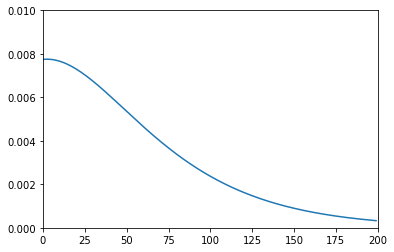

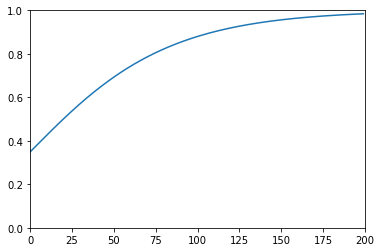

2.3741240211762555
47.43668724241126
199


In [13]:
#%% Wind speed for Class I and Class T turbines

U_ref_T = np.array([57]) # Class T turbine
U_ref_I = np.array([50]) # Class I turbine


## Class I
print('Class IA turbine')
# EWM turbulent wind model
U_hub_I = 0.95*U_ref_I
U_50_classI,U_1_classI,STD_classI = EWM_turbulent(U_ref_I,U_hub_I,z_TL,z_hh)
print('10-min extreme wind speed is %f (%f) for 50-year (1-year) recurrence' % (U_50_classI[i_z_IEC],U_1_classI[i_z_IEC]))
print('Turbulence standard deviation is %f' % (STD_classI))
# EWM steady wind model
U_e50_classI,U_e1_classI = EWM_steady(U_ref_I,z_TL,z_hh)
print('3-sec extreme wind speed is %f (%f) for 50-year (1-year) recurrence' % (U_e50_classI[i_z_IEC],U_e1_classI[i_z_IEC]))
print('  ')

## Class T
print('Class TA turbine')
# EWM turbulent wind model
U_hub_T = 0.95*U_ref_T
U_50_classT,U_1_classT,STD_classT = EWM_turbulent(U_ref_T,U_hub_T,z_TL,z_hh)
print('10-min extreme wind speed is %f (%f) for 50-year (1-year) recurrence' % (U_50_classT[i_z_IEC],U_1_classT[i_z_IEC]))
print('Turbulence standard deviation is %f' % (STD_classT))
# EWM steady wind model
U_e50_classT,U_e1_classT = EWM_steady(U_ref_T,z_TL,z_hh)
print('3-sec extreme wind speed is %f (%f) for 50-year (1-year) recurrence' % (U_e50_classT[i_z_IEC],U_e1_classT[i_z_IEC]))

## Gumbel distribution
p1 = -np.log(-np.log(1-1/1.1))
p50 = -np.log(-np.log(1-1/50))

alppha = (U_50_classT[i_z_IEC] - U_1_classT[i_z_IEC])/(p50-p1)
betta = U_50_classT[i_z_IEC] - alppha*p50

u_bins = np.arange(0,200,1)
gumb_pdf = (1/betta)*np.exp(-(u_bins - alppha)/betta)* np.exp( -np.exp( -(u_bins - alppha) /betta) )
gumb_cdf = np.exp(-1*np.exp(-(u_bins-alppha)/betta))

mpyplot.figure()
mpyplot.plot(u_bins,gumb_pdf)
mpyplot.ylim(0,0.01)
mpyplot.xlim(0,200)
mpyplot.show()

mpyplot.figure()
mpyplot.plot(u_bins,gumb_cdf)
mpyplot.ylim(0,1)
mpyplot.xlim(0,200)
mpyplot.show()

P_500 = 1-(1/500)
print(alppha)
print(betta)
print(u_bins[np.argmin(np.abs(gumb_cdf-P_500))])

In [14]:
#%% Get one-dimensional probabilities
fName_Prob_mean = 'prob_mean.pkl'
fName_Prob_gust = 'prob_gust.pkl'
fName_edges_gust = 'edges_gust2.pkl'
fName_edges_mean = 'edges_mean2.pkl'

# 26 deg C
with open(WRF_DIRECTORY_26 + fName_Prob_mean, 'rb') as file:
    hist_mean_rangeStats_26 = pickle.load(file)
with open(WRF_DIRECTORY_26 + fName_Prob_gust, 'rb') as file:
    hist_gust_rangeStats_26 = pickle.load(file)
with open(WRF_DIRECTORY_26 + fName_edges_gust, 'rb') as file:
    edges_gust2_26 = pickle.load(file)
with open(WRF_DIRECTORY_26 + fName_edges_mean, 'rb') as file:
    edges_mean2_26 = pickle.load(file)
# 28 deg C
with open(WRF_DIRECTORY_28 + fName_Prob_mean, 'rb') as file:
    hist_mean_rangeStats_28 = pickle.load(file)
with open(WRF_DIRECTORY_28 + fName_Prob_gust, 'rb') as file:
    hist_gust_rangeStats_28 = pickle.load(file)
with open(WRF_DIRECTORY_28 + fName_edges_gust, 'rb') as file:
    edges_gust2_28 = pickle.load(file)
with open(WRF_DIRECTORY_28 + fName_edges_mean, 'rb') as file:
    edges_mean2_28 = pickle.load(file)
# 30 deg C
with open(WRF_DIRECTORY_30 + fName_Prob_mean, 'rb') as file:
    hist_mean_rangeStats_30 = pickle.load(file)
with open(WRF_DIRECTORY_30 + fName_Prob_gust, 'rb') as file:
    hist_gust_rangeStats_30 = pickle.load(file)
with open(WRF_DIRECTORY_30 + fName_edges_gust, 'rb') as file:
    edges_gust2_30 = pickle.load(file)
with open(WRF_DIRECTORY_30 + fName_edges_mean, 'rb') as file:
    edges_mean2_30 = pickle.load(file)
# 32 deg C
with open(WRF_DIRECTORY_32 + fName_Prob_mean, 'rb') as file:
    hist_mean_rangeStats_32 = pickle.load(file)
with open(WRF_DIRECTORY_32 + fName_Prob_gust, 'rb') as file:
    hist_gust_rangeStats_32 = pickle.load(file)
with open(WRF_DIRECTORY_32 + fName_edges_gust, 'rb') as file:
    edges_gust2_32 = pickle.load(file)
with open(WRF_DIRECTORY_32 + fName_edges_mean, 'rb') as file:
    edges_mean2_32 = pickle.load(file)
# 34 deg C
with open(WRF_DIRECTORY_34 + fName_Prob_mean, 'rb') as file:
    hist_mean_rangeStats_34 = pickle.load(file)
with open(WRF_DIRECTORY_34 + fName_Prob_gust, 'rb') as file:
    hist_gust_rangeStats_34 = pickle.load(file)
with open(WRF_DIRECTORY_34 + fName_edges_gust, 'rb') as file:
    edges_gust2_34 = pickle.load(file)
with open(WRF_DIRECTORY_34 + fName_edges_mean, 'rb') as file:
    edges_mean2_34 = pickle.load(file)

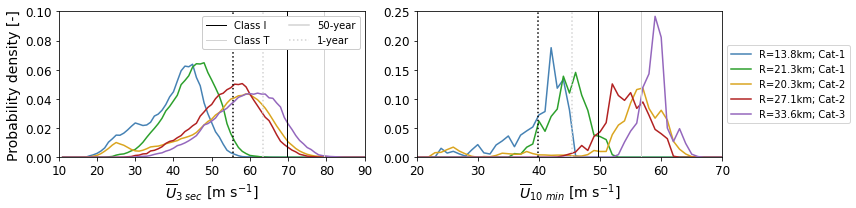

In [15]:
#%% Show pdf of 10-min winds

mpyplot.figure(figsize=(12,3))
mpyplot.subplot(1,2,1)
# mpyplot.plot(edges_gust_26[1:],np.nansum(hist_gust_mean_rangeStats_26,axis=1),color=col_26)
# mpyplot.plot(edges_gust_28[1:],np.nansum(hist_gust_mean_rangeStats_28,axis=1),color=col_28)
# mpyplot.plot(edges_gust_30[1:],np.nansum(hist_gust_mean_rangeStats_30,axis=1),color=col_30)
# mpyplot.plot(edges_gust_32[1:],np.nansum(hist_gust_mean_rangeStats_32,axis=1),color=col_32)
# mpyplot.plot(edges_gust_34[1:],np.nansum(hist_gust_mean_rangeStats_34,axis=1),color=col_34)
mpyplot.plot(edges_gust2_26[1:],hist_gust_rangeStats_26/np.sum(hist_gust_rangeStats_26),color=col_26)
mpyplot.plot(edges_gust2_28[1:],hist_gust_rangeStats_28/np.sum(hist_gust_rangeStats_28),color=col_28)
mpyplot.plot(edges_gust2_30[1:],hist_gust_rangeStats_30/np.sum(hist_gust_rangeStats_30),color=col_30)
mpyplot.plot(edges_gust2_32[1:],hist_gust_rangeStats_32/np.sum(hist_gust_rangeStats_32),color=col_32)
mpyplot.plot(edges_gust2_34[1:],hist_gust_rangeStats_34/np.sum(hist_gust_rangeStats_34),color=col_34)
# 50-year winds
mpyplot.plot([U_e50_classI[i_z_IEC],U_e50_classI[i_z_IEC]],[0,1],'-k',linewidth=1,label='Class I')
mpyplot.plot([U_e50_classT[i_z_IEC],U_e50_classT[i_z_IEC]],[0,1],'-',linewidth=1,color='lightgrey',label='Class T')
# 1-year winds
mpyplot.plot([U_e1_classI[i_z_IEC],U_e1_classI[i_z_IEC]],[0,1],':k',linewidth=1.5)
mpyplot.plot([U_e1_classT[i_z_IEC],U_e1_classT[i_z_IEC]],[0,1],':',linewidth=1.5,color='lightgrey')

# For legend
mpyplot.plot([-1,-1],[-1,-1],'-',label='50-year',color='lightgrey')
mpyplot.plot([-1,-1],[-1,-1],':',linewidth=1.5,label='1-year',color='lightgrey')

mpyplot.legend(ncol=2,loc=1, framealpha=1)
mpyplot.xlabel(r'$\overline{U}_{3\ sec}$ [m s$^{-1}$]',fontsize=14)
mpyplot.ylabel('Probability density [-]',fontsize=14)
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.ylim(0,0.1)
mpyplot.xlim(10,90)


mpyplot.subplot(1,2,2)
# mpyplot.plot(edges_mean_26[1:],np.nansum(hist_gust_mean_rangeStats_26,axis=0),color=col_26)
# mpyplot.plot(edges_mean_28[1:],np.nansum(hist_gust_mean_rangeStats_28,axis=0),color=col_28)
# mpyplot.plot(edges_mean_30[1:],np.nansum(hist_gust_mean_rangeStats_30,axis=0),color=col_30)
# mpyplot.plot(edges_mean_32[1:],np.nansum(hist_gust_mean_rangeStats_32,axis=0),color=col_32)
# mpyplot.plot(edges_mean_34[1:],np.nansum(hist_gust_mean_rangeStats_34,axis=0),color=col_34)
mpyplot.plot(edges_mean2_26[1:],hist_mean_rangeStats_26/np.sum(hist_mean_rangeStats_26),color=col_26,label='R='+str(np.round(r_eye_26/1000,1))+'km; Cat-1')
mpyplot.plot(edges_mean2_28[1:],hist_mean_rangeStats_28/np.sum(hist_mean_rangeStats_28),color=col_28,label='R='+str(np.round(r_eye_28/1000,1))+'km; Cat-1')
mpyplot.plot(edges_mean2_30[1:],hist_mean_rangeStats_30/np.sum(hist_mean_rangeStats_30),color=col_30,label='R='+str(np.round(r_eye_30/1000,1))+'km; Cat-2')
mpyplot.plot(edges_mean2_32[1:],hist_mean_rangeStats_32/np.sum(hist_mean_rangeStats_32),color=col_32,label='R='+str(np.round(r_eye_32/1000,1))+'km; Cat-2')
mpyplot.plot(edges_mean2_34[1:],hist_mean_rangeStats_34/np.sum(hist_mean_rangeStats_34),color=col_34,label='R='+str(np.round(r_eye_34/1000,1))+'km; Cat-3')
# 50-year winds
mpyplot.plot([U_50_classI[i_z_IEC],U_50_classI[i_z_IEC]],[0,1],'-k',linewidth=1)
mpyplot.plot([U_50_classT[i_z_IEC],U_50_classT[i_z_IEC]],[0,1],'-',linewidth=1,color='lightgrey')
# 1-year winds
mpyplot.plot([U_1_classI[i_z_IEC],U_1_classI[i_z_IEC]],[0,1],':k',linewidth=1.5)
mpyplot.plot([U_1_classT[i_z_IEC],U_1_classT[i_z_IEC]],[0,1],':',linewidth=1.5,color='lightgrey')

mpyplot.xlabel(r'$\overline{U}_{10\ min}$ [m s$^{-1}$]',fontsize=14)
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.ylim(0,0.25)
mpyplot.xlim(20,70)

mpyplot.legend(loc=3,ncol=1,bbox_to_anchor=[1, 0.2])

mpyplot.tight_layout()

# mpyplot.savefig(dirFig + "10m_3s_probEach_3.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')
mpyplot.savefig(dirFig + "10m_3s_probEach.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')


# print(np.shape(hist_gust_mean_rangeStats_34))
# print(np.shape(edges_mean_34[1:]))
# print(np.shape(edges_gust_34[1:]))

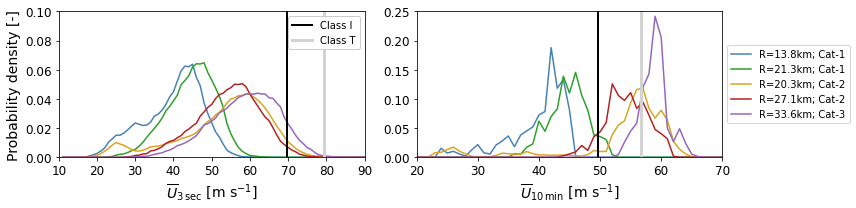

In [16]:
#%% Show pdf of 10-min and 3sec winds

mpyplot.figure(figsize=(12,3))
mpyplot.subplot(1,2,1)
mpyplot.plot(edges_gust2_26[1:],hist_gust_rangeStats_26/np.sum(hist_gust_rangeStats_26),color=col_26)
mpyplot.plot(edges_gust2_28[1:],hist_gust_rangeStats_28/np.sum(hist_gust_rangeStats_28),color=col_28)
mpyplot.plot(edges_gust2_30[1:],hist_gust_rangeStats_30/np.sum(hist_gust_rangeStats_30),color=col_30)
mpyplot.plot(edges_gust2_32[1:],hist_gust_rangeStats_32/np.sum(hist_gust_rangeStats_32),color=col_32)
mpyplot.plot(edges_gust2_34[1:],hist_gust_rangeStats_34/np.sum(hist_gust_rangeStats_34),color=col_34)
# 50-year winds
mpyplot.plot([U_e50_classI[i_z_IEC],U_e50_classI[i_z_IEC]],[0,1],'-k',linewidth=2,label='Class I')
mpyplot.plot([U_e50_classT[i_z_IEC],U_e50_classT[i_z_IEC]],[0,1],'-',linewidth=3,color='lightgrey',label='Class T')


mpyplot.legend(ncol=1,loc=1, framealpha=1)
mpyplot.xlabel(r'$\overline{U}_{3\, \rm sec}$ [m s$^{-1}$]',fontsize=14)
mpyplot.ylabel('Probability density [-]',fontsize=14)
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.ylim(0,0.1)
mpyplot.xlim(10,90)


mpyplot.subplot(1,2,2)
mpyplot.plot(edges_mean2_26[1:],hist_mean_rangeStats_26/np.sum(hist_mean_rangeStats_26),color=col_26,label='R='+str(np.round(r_eye_26/1000,1))+'km; Cat-1')
mpyplot.plot(edges_mean2_28[1:],hist_mean_rangeStats_28/np.sum(hist_mean_rangeStats_28),color=col_28,label='R='+str(np.round(r_eye_28/1000,1))+'km; Cat-1')
mpyplot.plot(edges_mean2_30[1:],hist_mean_rangeStats_30/np.sum(hist_mean_rangeStats_30),color=col_30,label='R='+str(np.round(r_eye_30/1000,1))+'km; Cat-2')
mpyplot.plot(edges_mean2_32[1:],hist_mean_rangeStats_32/np.sum(hist_mean_rangeStats_32),color=col_32,label='R='+str(np.round(r_eye_32/1000,1))+'km; Cat-2')
mpyplot.plot(edges_mean2_34[1:],hist_mean_rangeStats_34/np.sum(hist_mean_rangeStats_34),color=col_34,label='R='+str(np.round(r_eye_34/1000,1))+'km; Cat-3')
# 50-year winds
mpyplot.plot([U_50_classI[i_z_IEC],U_50_classI[i_z_IEC]],[0,1],'-k',linewidth=2)
mpyplot.plot([U_50_classT[i_z_IEC],U_50_classT[i_z_IEC]],[0,1],'-',linewidth=3,color='lightgrey')
mpyplot.xlabel(r'$\overline{U}_{10\, \rm min}$ [m s$^{-1}$]',fontsize=14)
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.ylim(0,0.25)
mpyplot.xlim(20,70)

mpyplot.legend(loc=3,ncol=1,bbox_to_anchor=[1, 0.2])

mpyplot.tight_layout()

# mpyplot.savefig(dirFig + "10m_3s_probEach_3.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')
mpyplot.savefig(dirFig + "10m_3s_probEach_50yr.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')



In [17]:
#%% Probability of occurrence

# Choose 1-year or 50-year recurrence

reccrnce = 50
turbClass = 'T'

# Thresholds 
if reccrnce==50:
    if turbClass=='I':
        thres_10 = U_50_classI[i_z_IEC]  # U_1_61a[i_z_IEC] U_50_61a[i_z_IEC] 
        thres_3 = U_e50_classI[i_z_IEC] # U_e1_61b[i_z_IEC] U_e50_61b[i_z_IEC]
    elif turbClass=='T':
        thres_10 = U_50_classT[i_z_IEC]
        thres_3 = U_e50_classT[i_z_IEC]
    print('Return period of 50 years for Class ' + turbClass + ' turbine')
    print(' ')
elif reccrnce==1:
    if turbClass=='I':
        thres_10 = U_1_classI[i_z_IEC]  # U_1_61a[i_z_IEC] U_50_61a[i_z_IEC] 
        thres_3 = U_e1_classI[i_z_IEC] # U_e1_61b[i_z_IEC] U_e50_61b[i_z_IEC]
    elif turbClass=='T':
        thres_10 = U_1_classT[i_z_IEC]
        thres_3 = U_e1_classT[i_z_IEC]
    print('Return period of 1 year for Class ' + turbClass + ' turbine')
    print(' ')

# 26 C
hist_mean_rangeStats_26_temp = np.zeros_like(hist_mean_rangeStats_26) + hist_mean_rangeStats_26/np.sum(hist_mean_rangeStats_26)
hist_mean_rangeStats_26_temp[edges_mean2_26[1:]<thres_10] = 0 #np.nan
hist_gust_rangeStats_26_temp = np.zeros_like(hist_gust_rangeStats_26) + hist_gust_rangeStats_26/np.sum(hist_gust_rangeStats_26)
hist_gust_rangeStats_26_temp[edges_gust2_26[1:]<thres_3] = 0 #np.nan
print('26C')
print('10-min: '+ str(100*np.nansum(hist_mean_rangeStats_26_temp)))
print('3-sec: '+ str(100*np.nansum(hist_gust_rangeStats_26_temp)))
print('  ')

# 28 C
hist_mean_rangeStats_28_temp = np.zeros_like(hist_mean_rangeStats_28) + hist_mean_rangeStats_28/np.sum(hist_mean_rangeStats_28)
hist_mean_rangeStats_28_temp[edges_mean2_28[1:]<thres_10] = 0 #np.nan
hist_gust_rangeStats_28_temp = np.zeros_like(hist_gust_rangeStats_28) + hist_gust_rangeStats_28/np.sum(hist_gust_rangeStats_28)
hist_gust_rangeStats_28_temp[edges_gust2_28[1:]<thres_3] = 0 #np.nan
print('28C')
print('10-min: '+ str(100*np.nansum(hist_mean_rangeStats_28_temp)))
print('3-sec: '+ str(100*np.nansum(hist_gust_rangeStats_28_temp)))
print('  ')

# 30 C
hist_mean_rangeStats_30_temp = np.zeros_like(hist_mean_rangeStats_30) + hist_mean_rangeStats_30/np.sum(hist_mean_rangeStats_30)
hist_mean_rangeStats_30_temp[edges_mean2_30[1:]<thres_10] = 0 #np.nan
hist_gust_rangeStats_30_temp = np.zeros_like(hist_gust_rangeStats_30) + hist_gust_rangeStats_30/np.sum(hist_gust_rangeStats_30)
hist_gust_rangeStats_30_temp[edges_gust2_30[1:]<thres_3] = 0 #np.nan
print('30C')
print('10-min: '+ str(100*np.nansum(hist_mean_rangeStats_30_temp)))
print('3-sec: '+ str(100*np.nansum(hist_gust_rangeStats_30_temp)))
print('  ')

# 32 C
hist_mean_rangeStats_32_temp = np.zeros_like(hist_mean_rangeStats_32) + hist_mean_rangeStats_32/np.sum(hist_mean_rangeStats_32)
hist_mean_rangeStats_32_temp[edges_mean2_32[1:]<thres_10] = 0 #np.nan
hist_gust_rangeStats_32_temp = np.zeros_like(hist_gust_rangeStats_32) + hist_gust_rangeStats_32/np.sum(hist_gust_rangeStats_32)
hist_gust_rangeStats_32_temp[edges_gust2_32[1:]<thres_3] = 0 #np.nan
print('32C')
print('10-min: '+ str(100*np.nansum(hist_mean_rangeStats_32_temp)))
print('3-sec: '+ str(100*np.nansum(hist_gust_rangeStats_32_temp)))
print('  ')

# 34 C
hist_mean_rangeStats_34_temp = np.zeros_like(hist_mean_rangeStats_34) + hist_mean_rangeStats_34/np.sum(hist_mean_rangeStats_34)
hist_mean_rangeStats_34_temp[edges_mean2_34[1:]<thres_10] = 0 #np.nan
hist_gust_rangeStats_34_temp = np.zeros_like(hist_gust_rangeStats_34) + hist_gust_rangeStats_34/np.sum(hist_gust_rangeStats_34)
hist_gust_rangeStats_34_temp[edges_gust2_34[1:]<thres_3] = 0 #np.nan
print('34C')
print('10-min: '+ str(100*np.nansum(hist_mean_rangeStats_34_temp)))
print('3-sec: '+ str(100*np.nansum(hist_gust_rangeStats_34_temp)))
print('  ')



Return period of 50 years for Class T turbine
 
26C
10-min: 0.0
3-sec: 0.0
  
28C
10-min: 0.0
3-sec: 0.0
  
30C
10-min: 46.17091179537508
3-sec: 0.08426363246028337
  
32C
10-min: 28.850172711571677
3-sec: 0.008539627710612167
  
34C
10-min: 86.6089935612712
3-sec: 0.21385531797679302
  


In [18]:
thres_3

79.38052295512215